<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Metrics_for_classification_Part_1_2_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metrics for classification - Supervised Learning
---
This first part is focused on **2-class** classification metrics only The second part covers the **n-class** classification.  

Evaluating a model is a major part of building an effective machine learning model. The most frequent classification evaluation metric that we use should be **Accuracy**.  
You might believe that the model is good when the accuracy rate is 99%!  
However, it is not always true and can be misleading in some situations. Other metrics are available and useful :

- The **Confusion Matrix** for a 2-class (or n-class) classification problem
- The key classification metrics: **Accuracy**, **Recall**, **Precision**, and **F1- Score**
- The **Receiver Operating Characteristic** (ROC) curve and the **Area Under the Curve**

Please visit this great ressource : [scikit-learn-mooc - Classification](https://inria.github.io/scikit-learn-mooc/python_scripts/metrics_classification.html).

## Objectives
- Understand the meaning and computation of the main **classification metrics**.
- Apply **scikit-learn** for computation of the main classification metrics.
- Be able to user classification metrics in a **ML workflow** with Pipeleine & GridSearch.

## Build a model
First we are building a first a very simple model.  


#### Load data

In [ ]:
# Load data
import pandas as pd
url = "https://raw.githubusercontent.com/remijul/dataset/master/penguins_size.csv"
data = pd.read_csv(url)

#### Drop missing values

In [ ]:
# Drop missing value
data.dropna(axis='rows', inplace = True)
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


#### Encode target data
This first chapter focuses on the 2-class classification.  
Then our target `y` should be processed as following.

In [ ]:
data['species'].value_counts()

other     188
Adelie    146
Name: species, dtype: int64

Lets' consider we would like to develop a 2-class classifier among the `Adelie` specie and the all other species.

In [ ]:
import numpy as np
data['species'] = np.where(data.species == 'Gentoo', 'other', data.species)
data['species'] = np.where(data.species == 'Chinstrap', 'other', data.species)
data['species'].value_counts()

other     188
Adelie    146
Name: species, dtype: int64

In [ ]:
# target preprocessing
from sklearn.preprocessing import LabelEncoder
lb_encod = LabelEncoder()
y = lb_encod.fit_transform(data['species'])
y[:5]

array([0, 0, 0, 0, 0])

#### Declare the features

In [ ]:
X = data.select_dtypes(exclude=['object'])
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


#### Split data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

#### Declare and train a basic model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Make predictions from the X_test set

In [ ]:
y_pred = model.predict(X_test)

#### Evaluate the accuracy score of the model

In [ ]:
# Score of models
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print("score :", round(score, 5))

score : 0.98507


## Accuracy score
Accuracy as a baseline : now that we have these predictions, we can compare them with the true predictions (sometimes called ground-truth) which we did not use until now.

In [ ]:
y_test == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In the comparison above, a `True` value means that the value predicted by our classifier is identical to the real value, while a `False` means that our classifier made a mistake.  
One way of getting an overall rate representing the generalization performance of our classifier would be to compute how many times our classifier was right and divide it by the number of samples in our set.

In [ ]:
# Global average of right predictions
import numpy as np
np.mean(y_test == y_pred)

0.9850746268656716

This measure is called the **accuracy**. 

In [ ]:
accuracy_score(y_test, y_pred)

0.9850746268656716

## Confusion matrix
The comparison that we did above and the accuracy that we calculated did not take into account the type of error our classifier was making.   Accuracy is an aggregate of the errors made by the classifier.  
We may be interested in finer granularity - to know independently what the error is for each of the two following cases:

- we predicted an event as a alert whereas it was a normal event;

- we predicted an event as normal wheareas it's a real alert.

In [ ]:
# Basic confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[28,  1],
       [ 0, 38]])

#### Plot confusion matrix with `sklearn`

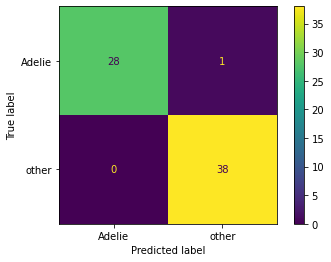

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_plot = ConfusionMatrixDisplay(confusion_matrix,
                                display_labels=np.unique(lb_encod.inverse_transform(model.classes_)))

cm_plot.plot()

The in-diagonal numbers are related to predictions that were correct while off-diagonal numbers are related to incorrect predictions (misclassifications). We now know the four types of correct and erroneous predictions:

- the top left corner are true positives (TP) and corresponds to people who gave blood and were predicted as such by the classifier;

- the bottom right corner are true negatives (TN) and correspond to people who did not give blood and were predicted as such by the classifier;

- the top right corner are false negatives (FN) and correspond to people who gave blood but were predicted to not have given blood;

- the bottom left corner are false positives (FP) and correspond to people who did not give blood but were predicted to have given blood.

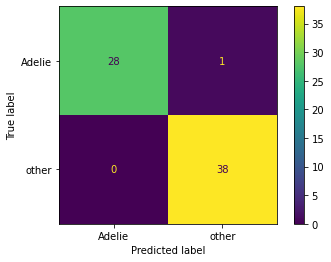

In [ ]:
# Equivalent 
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = model,
                                      X = X_test,
                                      y = y_test,
                                      display_labels=np.unique(lb_encod.inverse_transform(model.classes_)))

#### Plot confusion matrix with `seaborn`

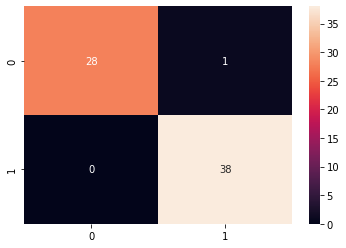

In [ ]:
# Confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt="d")

For a better understanding, we could add the labels of species.

In [ ]:
df_confusion_matrix = pd.DataFrame(confusion_matrix,
                                   index=np.unique(lb_encod.inverse_transform(y)),
                                   columns=np.unique(lb_encod.inverse_transform(y))
                                   )
df_confusion_matrix.head()

,Adelie,other
Adelie,28,1
other,0,38


Let's plot the labeled confusion matrix.

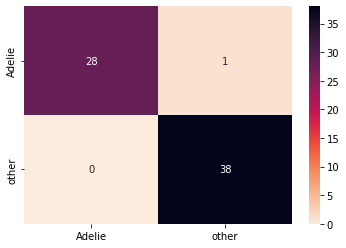

In [ ]:
sns.heatmap(df_confusion_matrix, annot=True, fmt="d", cmap = sns.cm.rocket_r)

## Precision & Recall
- **Precision** (also called positive predictive value) proportion of correct predictions among the points that were predicted positive. This is the ability of our model to trigger an alarm only for a real case.  
- **Recall** (also known as sensitivity) is the true positive rate, i.e. the proportion of positives that have been correctly identified. This is the ability of our model to detect all true alertes.  

Both precision and recall are therefore based on relevance.

In [ ]:
# counts the number of true positives (y_test = 1, y_pred = 1)
TP = sum((y_test == 1) & (y_pred == 1))
TP

38

In [ ]:
# counts the number of true negatives (y_test = 0, y_pred = 0)
TN = sum((y_test == 0) & (y_pred == 0))
TN

28

In [ ]:
# counts the number of false negatives (y_test = 1, y_pred = 0)
FN = sum((y_test == 1) & (y_pred == 0))
FN

0

In [ ]:
# counts the number of false positives (y_test = 0, y_pred = 1)
FP = sum((y_test == 0) & (y_pred == 1))
FP

1

#### Precision score
Precision is the fraction of predicted positives events that are actually positive.  
Precision score is computed as : TP / (TP + FP)

In [ ]:
precision = TP / (TP + FP)
precision

0.9743589743589743

And is available with `precision_score` from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import precision_score
precision2 = precision_score(y_test, y_pred)
precision2

0.9743589743589743

#### Recall score
Recall score is the fraction of positives events that you predicted correctly.  
Recall is computed as : TP / (TP + FN)

In [ ]:
recall = TP / (TP + FN)
recall

1.0

And is available with `recall_score` from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import recall_score
recall2 = recall_score(y_test, y_pred)
recall2

1.0

## ROC curve
A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.  
The method was originally developed for operators of military radar receivers starting in 1941, which led to its name. [Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)


#### ROC computation with `roc_curve`from `metrics`

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("False positive rate:", fpr)
print("True positive rate:", tpr)
print("Thresholds:", thresholds)

False positive rate: [0.         0.03448276 1.        ]
True positive rate: [0. 1. 1.]
Thresholds: [2 1 0]


#### ROC Curve with `RocCurveDisplay`from `metrics`

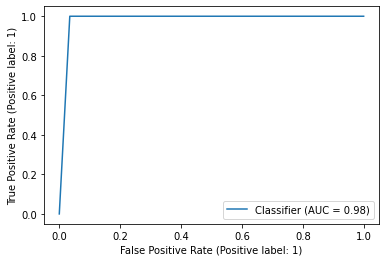

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)

Othe computations and informations are available with :
- `RocCurveDisplay.from_estimator` : Plot Receiver Operating Characteristic (ROC) curve given an estimator and some data.

- `RocCurveDisplay.from_predictions`: Plot Receiver Operating Characteristic (ROC) curve given the true and predicted values.

- `det_curve`: Compute error rates for different probability thresholds.

- `roc_auc_score`: Compute the area under the ROC curve.



## AUC : Area Under the Curve
The ROC curve can be summarized  by a number: "the area under the curve", also denoted AUC for "Area Under the ROC", which makes it easier to compare several models.

A perfect classifier has an AUC of 1; a random classifier, an AUC of 0.5.


In [ ]:
from sklearn import metrics
print("AUC: ", metrics.auc(fpr, tpr))

AUC:  0.9827586206896552


# Use metrics into a ML worflow
Let's consider we would like to apply different classification metrics into a complete ML workflow including `Pipeline` and `GridSearchCV`.

### Load libraries

In [49]:
# data
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler

# Pipeline and model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Score of models
from sklearn.metrics import accuracy_score, SCORERS

### Load data

In [50]:
# Load data
url = "https://raw.githubusercontent.com/remijul/dataset/master/penguins_size.csv"
data = pd.read_csv(url)

### Preprocessing
Target preprocessing

In [51]:
# target preprocessing
data['species'] = np.where(data.species == 'Gentoo', 'other', data.species)
data['species'] = np.where(data.species == 'Chinstrap', 'other', data.species)

lb_encod = LabelEncoder()
y = lb_encod.fit_transform(data['species'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Features preprocessing

In [52]:
# features preprocessing
X = data.drop(columns='species')
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Selection of categorical variables

In [53]:
# selection of categorical variables
column_cat = X.select_dtypes(include=['object']).columns#.drop(['artist_name', 'genre', 'track_name', 'track_id'])
column_cat

Index(['island', 'sex'], dtype='object')

In [54]:
# categorical variables
transfo_cat = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

Selection of numerical variables

In [55]:
# selection of numerical variables
column_num = X.select_dtypes(exclude=['object']).columns
column_num

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [56]:
# Numerical variables
transfo_num = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

### Column transformer

In [57]:
# Class ColumnTransformer : apply alls steps on the whole dataset
preparation = ColumnTransformer(
    transformers=[
        ('data_cat', transfo_cat , column_cat),
        ('data_num', transfo_num , column_num)
    ])

### Declare the model and parameters for Grid Search
Check the documentation for further explanation : [SVC()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [58]:
parameters = {'model__kernel':('linear', 'rbf'), 'model__C':[1, 10]}
svc = SVC()

### Declare the pipeline

In [59]:
pipe = Pipeline(steps=[('preparation', preparation),
                        ('model',svc)])
pipe

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['island', 'sex'], dtype='object')),
                                                 ('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                  

### Declare the metrics to be used
Metrics are defined at this stage, or at least, before any fitting operations.

In [60]:
metrics = ['accuracy', 'precision', 'recall', 'roc_auc']

More info about classification metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics]).  
Available metrics are shown below :

In [61]:
sorted(SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

### Declare the Grid Search method

In [62]:
grid = GridSearchCV(estimator = pipe, param_grid = parameters, scoring = metrics, refit = 'roc_auc', cv = 5, n_jobs =-1, verbose = 1)

### Split data into train and test set

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

### Fit the model

In [64]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('data_cat',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         Index(['island', 'sex'], dtype='object')),
                                                                        ('data_num',
                                                     

### Access to results from Cross Validation
List of available params from the GridSearch.

In [65]:
sorted(grid.get_params().keys())

['cv',
 'error_score',
 'estimator',
 'estimator__memory',
 'estimator__model',
 'estimator__model__C',
 'estimator__model__break_ties',
 'estimator__model__cache_size',
 'estimator__model__class_weight',
 'estimator__model__coef0',
 'estimator__model__decision_function_shape',
 'estimator__model__degree',
 'estimator__model__gamma',
 'estimator__model__kernel',
 'estimator__model__max_iter',
 'estimator__model__probability',
 'estimator__model__random_state',
 'estimator__model__shrinking',
 'estimator__model__tol',
 'estimator__model__verbose',
 'estimator__preparation',
 'estimator__preparation__data_cat',
 'estimator__preparation__data_cat__imputation',
 'estimator__preparation__data_cat__imputation__add_indicator',
 'estimator__preparation__data_cat__imputation__copy',
 'estimator__preparation__data_cat__imputation__fill_value',
 'estimator__preparation__data_cat__imputation__missing_values',
 'estimator__preparation__data_cat__imputation__strategy',
 'estimator__preparation__data

And all params in one call.

In [71]:
grid.get_params()#['cv']

{'cv': 5, 'error_score': nan, 'estimator': Pipeline(steps=[('preparation',
                  ColumnTransformer(transformers=[('data_cat',
                                                   Pipeline(steps=[('imputation',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('onehot',
                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                  sparse=False))]),
                                                   Index(['island', 'sex'], dtype='object')),
                                                  ('data_num',
                                                   Pipeline(steps=[('imputation',
                                                                    SimpleImputer(strategy='median')),
                                           

List of available results.

In [40]:
sorted(grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_accuracy',
 'mean_test_precision',
 'mean_test_recall',
 'mean_test_roc_auc',
 'param_model__C',
 'param_model__kernel',
 'params',
 'rank_test_accuracy',
 'rank_test_precision',
 'rank_test_recall',
 'rank_test_roc_auc',
 'split0_test_accuracy',
 'split0_test_precision',
 'split0_test_recall',
 'split0_test_roc_auc',
 'split1_test_accuracy',
 'split1_test_precision',
 'split1_test_recall',
 'split1_test_roc_auc',
 'split2_test_accuracy',
 'split2_test_precision',
 'split2_test_recall',
 'split2_test_roc_auc',
 'split3_test_accuracy',
 'split3_test_precision',
 'split3_test_recall',
 'split3_test_roc_auc',
 'split4_test_accuracy',
 'split4_test_precision',
 'split4_test_recall',
 'split4_test_roc_auc',
 'std_fit_time',
 'std_score_time',
 'std_test_accuracy',
 'std_test_precision',
 'std_test_recall',
 'std_test_roc_auc']

Access to the mean fit time from `cv_results_`.

In [ ]:
grid.cv_results_['mean_fit_time']

Access to the best score

In [40]:
grid.best_score_

1.0

Acces to the parameters providing the best score

In [35]:
grid.best_params_

{'model__C': 1, 'model__kernel': 'linear'}

### Make predictions

In [73]:
y_pred = grid.predict(X_test)

### Evaluate the accuracy score of the model
At this stage, performance are evaluated on the test set of data.

In [74]:
# Score of models
score = accuracy_score(y_test, y_pred)
print("score :", round(score, 5))

score : 1.0


# Conclusions
This notebook aimed at giving an overview of the classification metrics that can be used to evaluate the predictive model generalization performance.